# Playing around with Keras

https://realpython.com/python-keras-text-classification/

In [1]:
import sys
import os
workspace_path = os.path.join(os.path.abspath(".."))
sys.path.append(workspace_path)
workspace_path

'c:\\Users\\Kajsa\\VSCodeProjects\\job_discrimination_sandbox'

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from tensorflow import keras
from keras.models import Sequential
from keras.layers import TextVectorization, Dense
from keras.backend import clear_session
from sklearn.model_selection import train_test_split


In [3]:
pd.options.display.float_format = "{:.2f}".format

In [4]:
path_to_cleaned_data = os.path.join(workspace_path, "data", "cleaned_data")

In [5]:
# Reading application statistics into dataframe
file_path = os.path.join(path_to_cleaned_data, "bulletins_w_labels_and_content.csv")
df = pd.read_csv(file_path, dtype={"ID": str})

In [6]:
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [7]:
X = df["Cleaned text"]
y = df["Numeric label 70/30"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [9]:
# Initialize vectorizer
vectorizer = TextVectorization(output_mode="int", output_sequence_length=4000)

In [10]:
# Generate vocabulary from training data
vectorizer.adapt(X_train)

In [11]:
# Converting text to integer vectors
X_train = vectorizer(X_train)
X_test = vectorizer(X_test)

## Initializing model, training and prediction

In [12]:
input_dim = X_train.shape[1]  # Number of features

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [17]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 40,021
Trainable params: 40,021
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=False,
    validation_data=(X_test, y_test),
    batch_size=10
)

In [20]:
def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    x = range(1, len(acc) +1)

    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="Training acc")
    plt.plot(x, val_acc, "r", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="Training loss")
    plt.plot(x, val_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

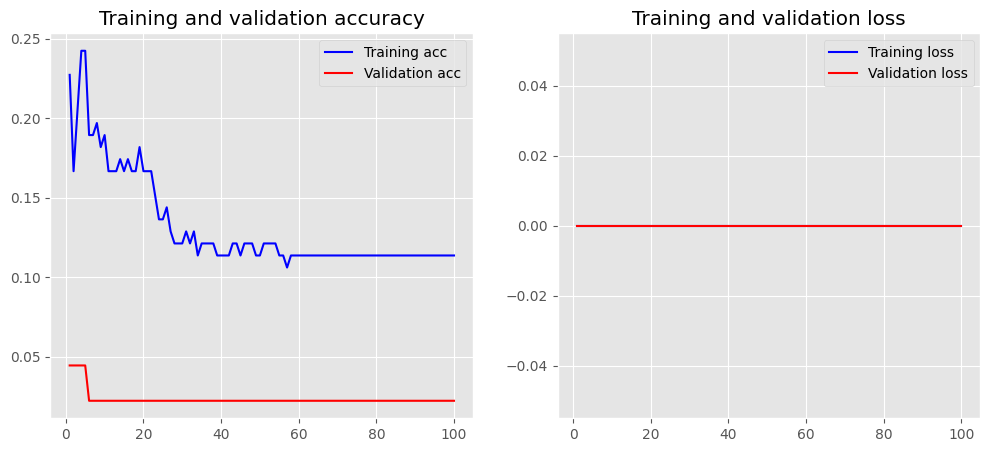

In [23]:
plot_history(history)

In [ ]:
history.history.keys()

In [ ]:
clear_session()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training accuracy: {accuracy}")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Test accuracy: {accuracy}")